In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sklearn functions and models
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef

In [6]:
#dt are the 3 drug types for which we run the models 
#select dt to choose drug type

dt = 'hall_add_aggr'

if dt not in ['hall_add_aggr','stim_add_aggr', 'depr_add_aggr']:
    raise ValueError('dt has to be one of: hall_add_aggr, stim_add_aggr, depr_add_aggr')

In [7]:
data = pd.read_csv('../data_processed/data_final_aggregates.csv')
data.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)
display(data)

,age,education,n_score,e_score,o_score,a_score,c_score,impulsiveness,ss,alcohol,...,ireland,uk,usa,male,female,depr_add_aggr,depr_woa_add_aggr,hall_add_aggr,hall_woc_add_aggr,stim_add_aggr
0,0.49788,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5,...,0,1,0,0,1,0,0,0,0,0
1,-0.07854,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,...,0,1,0,1,0,0,0,0,0,1
2,0.49788,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,...,0,1,0,1,0,1,0,0,0,0
3,-0.95197,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,...,0,1,0,0,1,0,0,0,0,0
4,0.49788,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,-0.61113,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,5,...,0,0,1,0,1,1,1,1,1,0
1881,-0.95197,-0.61113,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,5,...,0,0,1,1,0,0,0,2,2,1
1882,-0.07854,0.45468,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,4,...,0,0,1,0,1,2,2,1,0,2
1883,-0.95197,-0.61113,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,5,...,0,0,1,0,1,1,1,2,2,1


In [8]:
substances = ['alcohol','anphet', 'amyl', 'benzo', 'caffeine', 'cannabis', 
              'chocolate', 'cocaine', 'crack', 'ecstasy', 'heroine', 'ketamine', 
              'legal_h', 'lsd', 'meth', 'mushrooms', 'nicotine', 'semer', 'vsa', 'male']
data.drop(columns=substances, inplace=True, axis=1)
data

,age,education,n_score,e_score,o_score,a_score,c_score,impulsiveness,ss,asian,...,new_zealand,ireland,uk,usa,female,depr_add_aggr,depr_woa_add_aggr,hall_add_aggr,hall_woc_add_aggr,stim_add_aggr
0,0.49788,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0,...,0,0,1,0,1,0,0,0,0,0
1,-0.07854,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0,...,0,0,1,0,0,0,0,0,0,1
2,0.49788,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,...,0,0,1,0,0,1,0,0,0,0
3,-0.95197,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,...,0,0,1,0,1,0,0,0,0,0
4,0.49788,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,-0.61113,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,0,...,0,0,0,1,1,1,1,1,1,0
1881,-0.95197,-0.61113,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,0,...,0,0,0,1,0,0,0,2,2,1
1882,-0.07854,0.45468,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,0,...,0,0,0,1,1,2,2,1,0,2
1883,-0.95197,-0.61113,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,0,...,0,0,0,1,1,1,1,2,2,1


Text(0.5, 1.0, 'Stimulants mutual information')

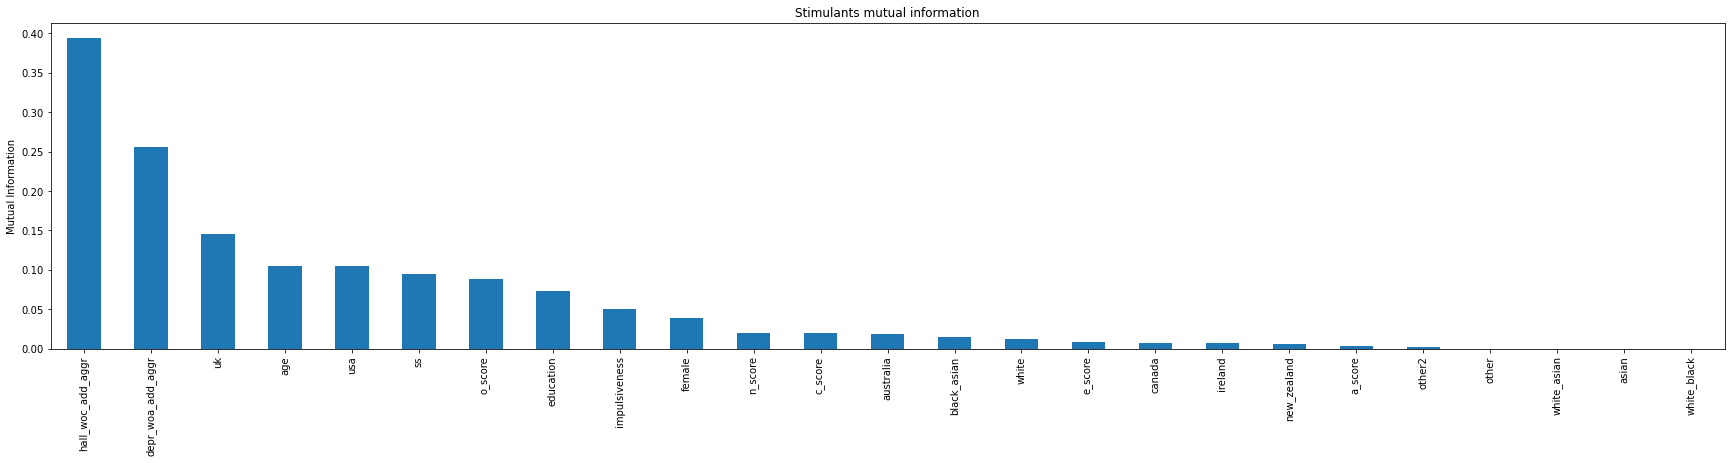

In [9]:
# where more information is stored (I think, does someone know it better?)

data[dt].replace(2,1, inplace = True) #just 2 classes not three
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns = ['hall_add_aggr','stim_add_aggr', 'depr_add_aggr'], axis=1), 
                                                    data[dt], test_size=0.25, random_state=0)

mi = mutual_info_classif(X_train, y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(30, 6))
plt.ylabel('Mutual Information')
plt.title('Stimulants mutual information')

## Balance classes

In [11]:
import imblearn
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

 ## Grid search

#### Logistic regression

In [17]:
from sklearn.model_selection import GridSearchCV

grid={"C":[0.001,.009,0.01,.09,1,5,10,25], "penalty":['none,'"l1","l2"]}# l1 lasso l2 ridge

#training 
model = LogisticRegression(random_state = 0, max_iter=10000)
logreg_cv = GridSearchCV(model,grid,cv=5, scoring = 'f')
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("F1 :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 25, 'penalty': 'l2'}
F1 : 0.8052288409709625


C:\Users\Francesca\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Francesca\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Francesca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Francesca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 441, in _check_solver
    raise 

#### Random Forest

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import time

tic = time.time()
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, 
                               cv = 5, verbose=2, random_state=42, n_jobs = -1, scoring = 'f1')

rf_random.fit(X_train,y_train)

tac = time.time()

running_time = tac-tic

print(f'Running time {running_time}')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Francesca\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Running time 728.8469607830048
